In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:

# Activation function: convert values between 0 and 1
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Initialize column names
# column_names = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9','col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18','col19', 'col20', 'col21', 'col22', 'col23', 'col24', 'col25', 'col26', 'col27','col28','col29','col30']

In [0]:
# --- Step 1 - Read the data file
given_data = pd.read_csv('wdbc.dataset',header=None)

In [0]:
# --- Step 2 - Process the data file
# 2.i - Drop the column id
given_data = given_data.iloc[:,1:].values

# 2.ii - Map the label column to 0 or 1
# convert list to dataframe
df_obj = pd.DataFrame(given_data)

# creating a dict file
label_class = {'B': 0,'M': 1}

# Map the label
df_obj[0] = df_obj[0].map(label_class)

In [0]:
# --- Step 3 - Normalizing the data
# input 
x = df_obj.iloc[:,1:].values

# output 
y = df_obj.iloc[:,0].values

from sklearn.preprocessing import MinMaxScaler
min_max_x = MinMaxScaler()
x = min_max_x.fit_transform(x)

In [0]:
# --- Step 4 - Split the dataframe into Training(80%), Validation(10%) and Testing(10%)

# 4.i - Toal(100%) = Training(80%) + Non-training(20%)
from sklearn.model_selection import train_test_split
x_training, x_non_training, y_training, y_non_training = train_test_split( x, y, test_size = 0.20, random_state = 0)

# 4.ii - Non-training(20%) = Validation(10%) + Testing(10%)
x_validation, x_testing, y_validation, y_testing = train_test_split( x_non_training, y_non_training, test_size = 0.50, random_state = 0)

Training Loss:
0.11818079546353286


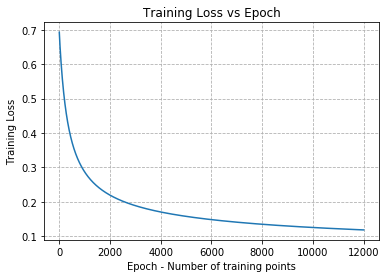

Validation Loss:
0.014371505594214025


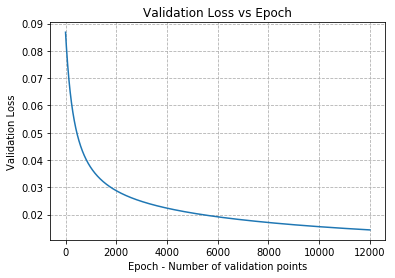

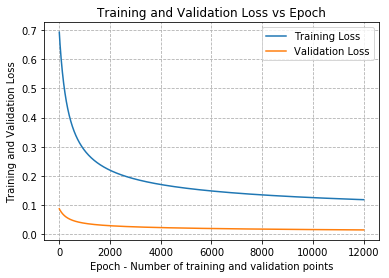

Training Accuracy:


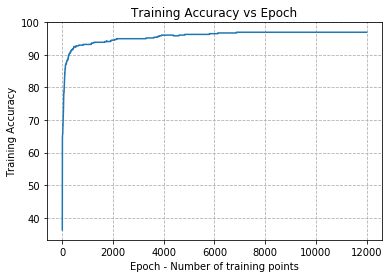

Validation Accuracy:


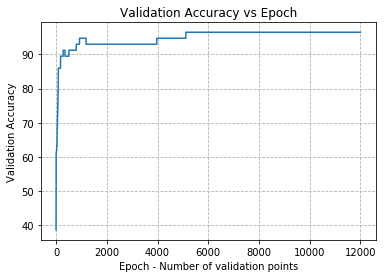

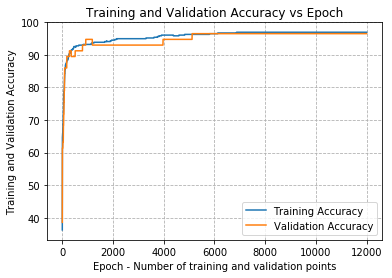

Training Precision:


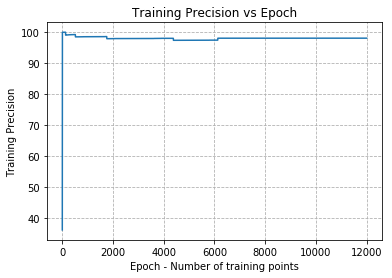

Validation Precision:


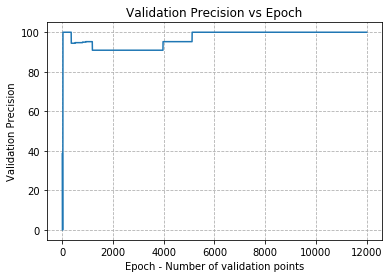

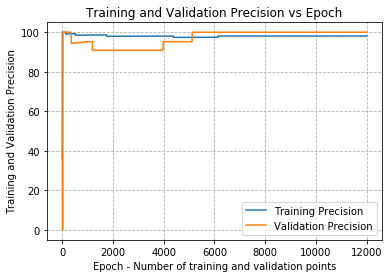

Training Recall:


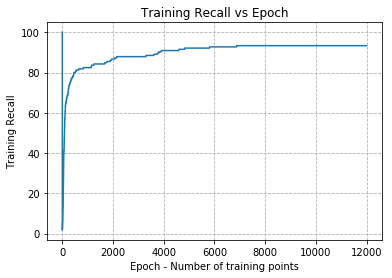

Validation Recall:


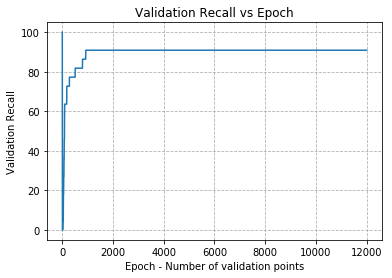

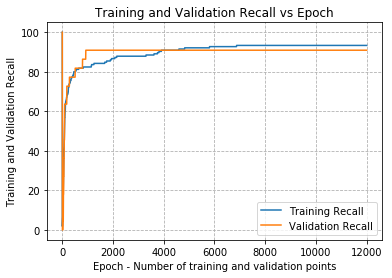

Accuracy result on Test Data:
96.49122807017544
Precision result on Test Data:
96.0
Recall result on Test Data:
96.0


In [7]:
# --- Step 5 - Initialize weights, biase and learning rate
x_training = x_training.T
y_training = y_training.reshape(1, y_training.shape[0])

x_validation = x_validation.T
y_validation =  y_validation.reshape(1, y_validation.shape[0])
epochs = 12000
# w = np.random.randn(x_training.shape[0], 1)*0.01
w = np.zeros((x_training.shape[0],1))
biase = 0
learning_rate = 0.05
probability_threshold = 0.5
total_training_loss = []
total_validation_loss = []
total_accuracy_training = []
total_accuracy_validation = []
total_precision_training = []
total_precision_validation = []
total_recall_training = []
total_recall_validation = []
m = x_training.shape[1]


for epoch in range(epochs):
  # Training data
  z_training = np.dot(w.T, x_training) + biase
  a_training = sigmoid(z_training)
  a_training_check = (a_training >= probability_threshold).astype(int)
  cost_training = (-1 / m) * np.sum(np.multiply(np.log(a_training), y_training) + np.multiply((1 - y_training), np.log(1 - a_training)))
  total_training_loss.append(np.squeeze(cost_training))
  
  # Validation data
  z_validation = np.dot(w.T, x_validation) + biase
  a_validation = sigmoid(z_validation)
  cost_validation = (-1 / m) * np.sum(np.multiply(np.log(a_validation), y_validation) + np.multiply((1 - y_validation), np.log(1 - a_validation)))
  total_validation_loss.append(np.squeeze(cost_validation))
  
  # Main Logic
  dz = a_training-y_training
  dw = (-1 / m) * np.dot(x_training, (y_training-a_training).T)
  db = (-1 / m) * np.sum(y_training-a_training)
  w = w - learning_rate * dw 
  biase = biase - learning_rate * db
  
  # Confusion matrix for training
  array_1 = y_training[0]
  array_2 = (a_training >= probability_threshold).astype(int)[0]
  TP_training = TN_training = FP_training = FN_training = 0
  for i in range(len(array_1)): 
    if array_1[i]==array_2[i]==1:
      TP_training += 1
    if array_2[i]==1 and array_1[i]!=array_2[i]:
      FP_training += 1
    if array_1[i]==array_2[i]==0:
      TN_training += 1
    if array_2[i]==0 and array_1[i]!=array_2[i]:
      FN_training += 1

  # Accuracy, precision, recall for training
  current_accuracy_training = (TP_training + TN_training)/(TP_training + FP_training + TN_training + FN_training)*100
  total_accuracy_training.append(current_accuracy_training)
  if TP_training == 0 and FP_training == 0:
    current_precision_training = 0
  else:
    current_precision_training = (TP_training)/(TP_training + FP_training)*100
  total_precision_training.append(current_precision_training)
  if TP_training == 0 and FN_training == 0:
    current_recall_training = 0
  else:
     current_recall_training = (TP_training)/(TP_training + FN_training)*100
  total_recall_training.append(current_recall_training)
  
  # Confusion matrix for validation
  array_1 = y_validation[0]
  array_2 = (a_validation >= probability_threshold).astype(int)[0]
  TP_validation = TN_validation = FP_validation = FN_validation = 0
  for i in range(len(array_1)): 
    if array_1[i]==array_2[i]==1:
      TP_validation += 1
    if array_2[i]==1 and array_1[i]!=array_2[i]:
      FP_validation += 1
    if array_1[i]==array_2[i]==0:
      TN_validation += 1
    if array_2[i]==0 and array_1[i]!=array_2[i]:
      FN_validation += 1

  # Accuracy, precision, recall for validation
  current_accuracy_validation = (TP_validation + TN_validation)/(TP_validation + FP_validation + TN_validation + FN_validation)*100
  total_accuracy_validation.append(current_accuracy_validation)
  if TP_validation == 0 and FP_validation == 0:
    current_precision_validation = 0
  else:
    current_precision_validation = (TP_validation)/(TP_validation + FP_validation)*100
  total_precision_validation.append(current_precision_validation)
  if TP_validation == 0 and FN_validation == 0:
    current_recall_validation = 0
  else:
    current_recall_validation = (TP_validation)/(TP_validation + FN_validation)*100
  total_recall_validation.append(current_recall_validation)

# Plot Training Loss
print("Training Loss:")
print(cost_training)
plt.plot(total_training_loss)
plt.title("Training Loss vs Epoch")
plt.xlabel('Epoch - Number of training points')
plt.ylabel('Training Loss')
plt.grid(ls='--')
plt.show()

# Plot Validation Loss
print("Validation Loss:")
print(cost_validation)
plt.plot(total_validation_loss)
plt.title("Validation Loss vs Epoch")
plt.xlabel('Epoch - Number of validation points')
plt.ylabel('Validation Loss')
plt.grid(ls='--')
plt.show()

# Plot Training and Validation Loss
plt.plot(total_training_loss,label="Training Loss")
plt.plot(total_validation_loss,label="Validation Loss")
plt.title("Training and Validation Loss vs Epoch")
plt.xlabel('Epoch - Number of training and validation points')
plt.ylabel('Training and Validation Loss')
plt.legend(loc='best')
plt.grid(ls='--')
plt.show()

# Plot Training Accuracy
print('Training Accuracy:')
# print(total_accuracy_training)
plt.plot(total_accuracy_training)
plt.title("Training Accuracy vs Epoch")
plt.xlabel('Epoch - Number of training points')
plt.ylabel('Training Accuracy')
plt.grid(ls='--')
plt.show()

# Plot Validation Accuracy
print('Validation Accuracy:')
# print(total_accuracy_validation)
plt.plot(total_accuracy_validation)
plt.title("Validation Accuracy vs Epoch")
plt.xlabel('Epoch - Number of validation points')
plt.ylabel('Validation Accuracy')
plt.grid(ls='--')
plt.show()

# Plot Training and Validation Accuracy
plt.plot(total_accuracy_training,label="Training Accuracy")
plt.plot(total_accuracy_validation,label="Validation Accuracy")
plt.title("Training and Validation Accuracy vs Epoch")
plt.xlabel('Epoch - Number of training and validation points')
plt.ylabel('Training and Validation Accuracy')
plt.legend(loc='best')
plt.grid(ls='--')
plt.show()

# Plot Training Precision
print('Training Precision:')
# print(total_precision_training)
plt.plot(total_precision_training)
plt.title("Training Precision vs Epoch")
plt.xlabel('Epoch - Number of training points')
plt.ylabel('Training Precision')
plt.grid(ls='--')
plt.show()

# Plot Validation Precision
print('Validation Precision:')
# print(total_precision_validation)
plt.plot(total_precision_validation)
plt.title("Validation Precision vs Epoch")
plt.xlabel('Epoch - Number of validation points')
plt.ylabel('Validation Precision')
plt.grid(ls='--')
plt.show()

# Plot Training and Validation Precision
plt.plot(total_precision_training,label="Training Precision")
plt.plot(total_precision_validation,label="Validation Precision")
plt.title("Training and Validation Precision vs Epoch")
plt.xlabel('Epoch - Number of training and validation points')
plt.ylabel('Training and Validation Precision')
plt.legend(loc='best')
plt.grid(ls='--')
plt.show()

# Plot Training Recall
print('Training Recall:')
# print(total_recall_training)
plt.plot(total_recall_training)
plt.title("Training Recall vs Epoch")
plt.xlabel('Epoch - Number of training points')
plt.ylabel('Training Recall')
plt.grid(ls='--')
plt.show()

# Plot Validation Recall
print('Validation Recall:')
# print(total_recall_validation)
plt.plot(total_recall_validation)
plt.title("Validation Recall vs Epoch")
plt.xlabel('Epoch - Number of validation points')
plt.ylabel('Validation Recall')
plt.grid(ls='--')
plt.show()

# Plot Training and Validation Recall
plt.plot(total_recall_training,label="Training Recall")
plt.plot(total_recall_validation,label="Validation Recall")
plt.title("Training and Validation Recall vs Epoch")
plt.xlabel('Epoch - Number of training and validation points')
plt.ylabel('Training and Validation Recall')
plt.legend(loc='best')
plt.grid(ls='--')
plt.show()

# Testing data
x_testing = x_testing.T
y_testing =  y_testing.reshape(1, y_testing.shape[0])
y_testing_check = sigmoid(np.dot(w.T, x_testing) + biase)
y_testing_check = (y_testing_check >= probability_threshold).astype(int)

# Confusion matrix for testing
array_1 = y_testing[0]
array_2 = y_testing_check[0]
TP_testing = TN_testing = FP_testing = FN_testing = 0
for i in range(len(array_1)): 
  if array_1[i]==array_2[i]==1:
    TP_testing += 1
  if array_2[i]==1 and array_1[i]!=array_2[i]:
    FP_testing += 1
  if array_1[i]==array_2[i]==0:
    TN_testing += 1
  if array_2[i]==0 and array_1[i]!=array_2[i]:
    FN_testing += 1

# Accuracy, precision, recall for testing
total_accuracy_testing = (TP_testing + TN_testing)/(TP_testing + FP_testing + TN_testing + FN_testing)*100
if TP_testing == 0 and FP_testing == 0:
  total_precision_testing = 0
else:
  total_precision_testing = (TP_testing)/(TP_testing + FP_testing)*100
if TP_testing == 0 and FN_testing == 0:
  total_recall_testing = 0
else:
  total_recall_testing = (TP_testing)/(TP_testing + FN_testing)*100

print('Accuracy result on Test Data:')
print(total_accuracy_testing)

print('Precision result on Test Data:')
print(total_precision_testing)

print('Recall result on Test Data:')
print(total_recall_testing)